# Mandelbrot Set
by [Paulo Marques](http://pmarques.eu), 2013/09/22

---

This notebook shows how to implement and visualize the [Mandelbrot Set](http://en.wikipedia.org/wiki/Mandelbrot_set) in Python. The Mandelbrot set is a very well known and beautiful fractal discovered in the 70s. It was named after Benoit Mandelbrot, a well-known mathematician. The first images of this object were computed in 1978.

![](https://raw.github.com/pjpmarques/Modelling-the-World/master/imgs/Mandel_1978.png)

Let's do it in Python.

----

We start by importing some basic libraries:


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
The basic idea behind the Mandelbrot set is that you have a 2D plane that represents an image. Each point of that plane is a complex number $z = x + y i$. Now, suppose what happens if, for each point $c$ in the plane, you iterate over and over calculating a new number as follows:

$$ z_{n+1} \gets z_{n}^2 + c$$

In this formula $z_0$ is 0 and $c$ is the point in the plane you are looking at. 

In this situation, two different things can happen. As the number of iterations advances either $\|z\|$ tends to infinity or it tends to 0. Mathematicaly, points where it tends to zero, are part of the set and are colored black. Points that tend to infinity are not part of the set and are colored white. 

Since in a computer you cannot iterate an infinite number of times, typically you put a bound on how many times you do this calculation. Also, you can use the "how fast" $\|z\|$ is going to infinity to color the set much more nicely. You can also check if $z$ is going to infinity just by comparing $\|z\|$ with 2. If it has grown that big, it certainly is not part of the set.

So, for a point $c$, lets define a function `mandel_pt()` that tells us the number of iterations that point is taking to diverge to infinity. (Note: points that are truly inside the set will take `MAX_ITER` iterations. We will map those to zero as it makes for nicer colors.)


In [2]:
def mandel_pt(c, MAX_ITER=100):
    """Calculates the number of iterations for point <c> for the Mandelbrot set"""

    iter = 0
    z    = 0
    while (iter < MAX_ITER):
        z = z**2 + c
        iter+= 1
        if abs(z) > 2.0:
            break

    return iter if iter!=MAX_ITER else 0

Now we want to define a function that for a rectangle of $width \times height$ pixels, representing the complex plane that goes from $z_{min}$ to $z_{max}$, calculates the corresponding image. I.e., we are going to map all the points in that rectangle to a color, using `mandel_it()`, returning the corresponding image:

In [3]:
def mandel(width, height, zmin, zmax):
    """Calculates the mandelbrot set for a certain image size (width, height) over a certain rectangle (zmin->zmax)"""

    # This function maps an (i,j) position of the screen to a complex number inside of the rectangle
    def map_pos(i, j):
        return zmin + j*(zmax-zmin).real/width + i*(zmax-zmin).imag/height*1j    
    
    # Now return the Mandelbrot set by mapping each point to the corresponding number of iterations
    return [[mandel_pt(map_pos(i, j)) for j in range(width)] for i in range(height)]

We are all set! Let's calculate it:

In [4]:
# Width and height of the image
(width, height) = (1024, 768)

# The complex plane to map
(zmin, zmax) = (-2.2-1.5j, +1.2+1.5j)

# The Mandelbrot set
mandel = mandel(width, height, zmin, zmax)

The corresponding image:

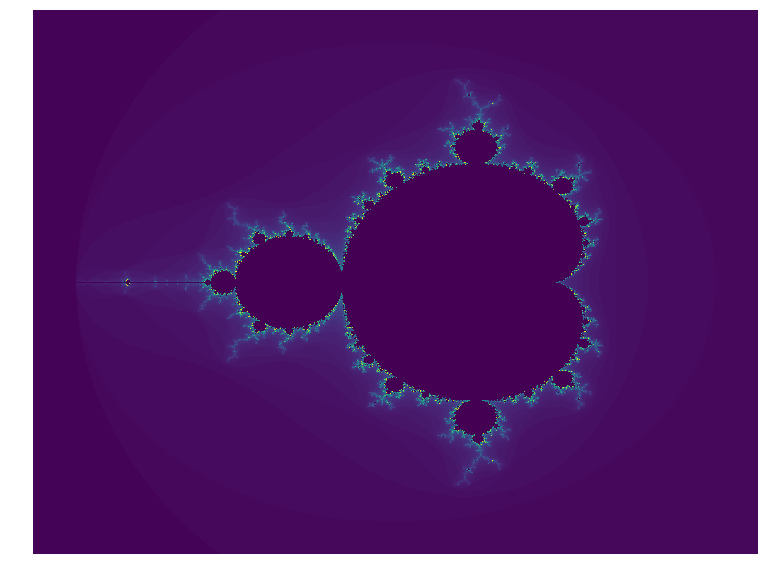

In [5]:
figure(figsize=(16,10))
axis('off')
imshow(mandel)

---

# MIT LICENSE

> Copyright (C) 2013 Paulo Marques (pjp.marques@gmail.com)
>
> Permission is hereby granted, free of charge, to any person obtaining a copy of 
> this software and associated documentation files (the "Software"), to deal in
> the Software without restriction, including without limitation the rights to
> use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
> the Software, and to permit persons to whom the Software is furnished to do so,
> subject to the following conditions:
>  
> The above copyright notice and this permission notice shall be included in all 
> copies or substantial portions of the Software.
> 
> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
> FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
> COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
> IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN 
> CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.